# Epidemic on Clustered Networks

## Summary

In this tutorial, we numerically study how clustering affects the epidemic.

We use:

- The *Watts-Strogatz* network model, whose clustering can be easily tuned.
  *Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of ‘small-world’ networks. Nature, 393(6684), 440-442.*

- A generalization of the configuration model, where we can tune both the clustering coefficient and the degree distribution. That generalization is based on the article:  
  *Ángeles Serrano, M., & Boguná, M. (2005). Tuning clustering in random networks with arbitrary degree distributions. Physical Review E—Statistical, Nonlinear, and Soft Matter Physics, 72(3), 036133.*

In [8]:
import nextnet as nn 
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt

## Watts-Strogatz

### Generate Network

mean degree:4.0
var degree:1.0134
average number of triangles per node 0.18
assortativity:-0.062


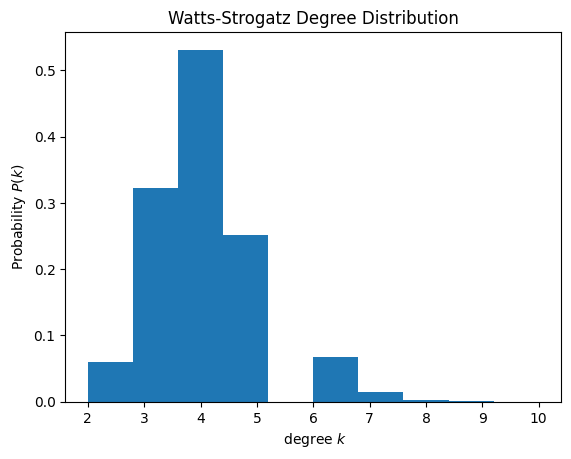

In [9]:
# Network parameters
n = 10**4 # network size
k0 = 4 # number of nearest neighbors
p0 = 0.3 # rewiring probability


# Generate the graph
np.random.seed(0) # to ensure the sum of the degrees are even
g = nx.watts_strogatz_graph(n, k0, p0, seed=1)

gx = nn.networkx(g)
mat, prop = nn.reproduction_matrix(gx) # compute properties of the network
[r, c, k1, k2, k3, m1, m2, R0, R_r, R_pert] = prop 


# Get degree list
degrees = [d for n, d in g.degree()]

print(f"mean degree:{np.mean(degrees)}")
print(f"var degree:{np.var(degrees)}")
print(f"average number of triangles per node {np.round(c,2)}") # for nodes with degree k>1 
print(f"assortativity:{np.round(r,3)}")

plt.hist(degrees,density=True)
plt.xlabel(" degree $k$")
plt.ylabel("Probability $P(k)$")
plt.title("Watts-Strogatz Degree Distribution")
plt.show()

### Run Simulation

In [3]:
psi = nn.transmission_time_weibull(2,2)
sim = nn.simulation(gx,psi)
sim.add_infections([(0,0)])
rng= nn.rng(0)
results = sim.run(rng) 

### Measure Exponential Rate

The epidemic is self-averaging and exhibit an exponential growth. We can numerically estimate the growth rate by fitting a generalized logistic function and extracting the rate, using `nn.measure_rate`

exponential rate: 0.64


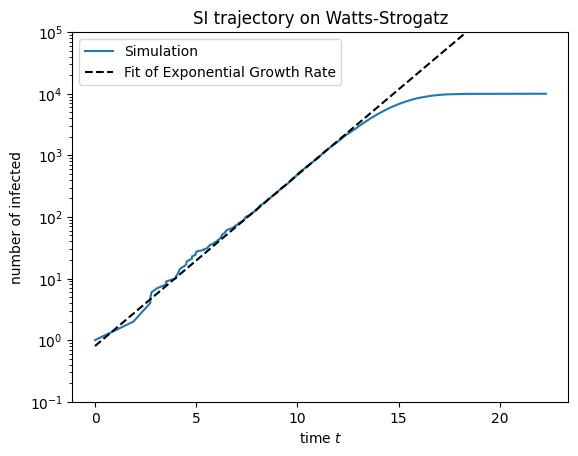

In [4]:
time= np.array(results["time"])
infected = np.array(results["infected"])

rate_fit  , fit_params = nn.measure_rate(time,infected)
i0 = fit_params[2]
print("exponential rate:",np.round(rate_fit,3))
plt.plot(time,infected,label="Simulation")
plt.plot(time,i0*np.exp(time*rate_fit),'k--',label="Fit of Exponential Growth Rate")
plt.yscale("log")
plt.ylim([0.1,n*10])
plt.xlabel("time $t$")
plt.ylabel("number of infected")
plt.title("SI trajectory on Watts-Strogatz")
plt.legend()
plt.show()

## Clustered Configuration Model

We repeat this for a network with similar clustering properties but with a strong heterogeneity in the degrees. We use *Ángeles Serrano, M., & Boguná, M. (2005). Tuning clustering in random networks with arbitrary degree distributions. Physical Review E—Statistical, Nonlinear, and Soft Matter Physics, 72(3), 036133.* to generate such networks.

True
mean degree:3.8774
var degree:19.00596924
average number of triangles per node 0.15
assortativity:0.073


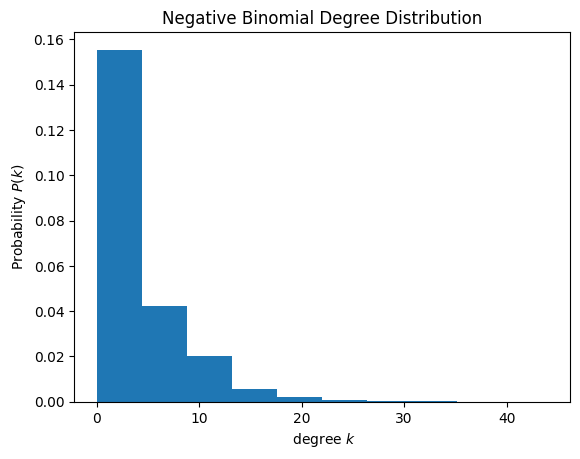

In [5]:
n0 = 1
p0 = 0.2
n = 10**4

np.random.seed(0) # to ensure the sum of the degrees are even
degrees = np.random.negative_binomial(n0,p0, size = n)

rng = nn.rng(0)
alpha= 0.7
beta=3
g= nn.configuration_model_clustered(degrees,alpha,beta,rng)
print(g.triangles_unsatisfied) # were the constraints too much?

mat, prop = nn.reproduction_matrix(g) # compute properties of the network
[r, c, k1, k2, k3, m1, m2, R0, R_r, R_pert] = prop 


print(f"mean degree:{np.mean(degrees)}")
print(f"var degree:{np.var(degrees)}")
print(f"average number of triangles per node {np.round(c,2)}") # for nodes with degree k>1 
print(f"assortativity:{np.round(r,3)}")

plt.hist(degrees,density=True)
plt.xlabel(" degree $k$")
plt.ylabel("Probability $P(k)$")
plt.title("Negative Binomial Degree Distribution")
plt.show()

This network has a similar clustering coefficient and similar average degree but has a strong variance in the degree and the degree of connected nodes are slightly positively corrected $(r>0)$. This results in a faster spreading rate of the epidemic.

### Run Simulation

In [6]:
psi = nn.transmission_time_weibull(2,2)
sim = nn.simulation(g,psi)
sim.add_infections([(0,0)])
rng= nn.rng(0)
results = sim.run(rng) 

### Measure Exponential Rate

exponential rate: 1.496


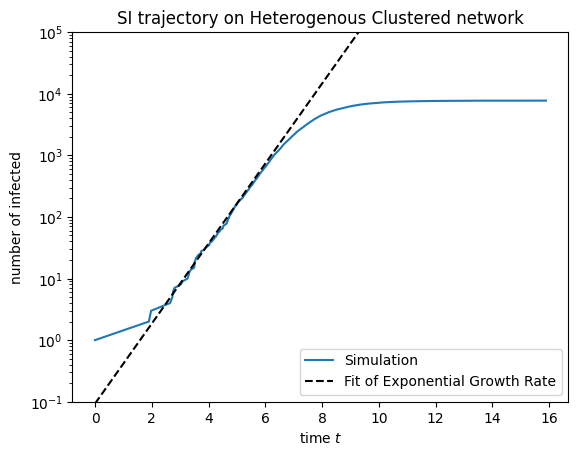

In [7]:
time= np.array(results["time"])
infected = np.array(results["infected"])

rate_fit  , fit_params = nn.measure_rate(time,infected)
i0 = fit_params[2]
print("exponential rate:",np.round(rate_fit,3))
plt.plot(time,infected,label="Simulation")
plt.plot(time,i0*np.exp(time*rate_fit),'k--',label="Fit of Exponential Growth Rate")
plt.yscale("log")
plt.ylim([0.1,n*10])
plt.xlabel("time $t$")
plt.ylabel("number of infected")
plt.title("SI trajectory on Heterogenous Clustered network")
plt.legend()
plt.show()

Clustering in a network has the tendency to slow down the epidemic. Degree heterogeneity and positive assortativity have the opposite effect.

In general, the growth rate of the epidemic can be explicitly related to the network properties and the infection times using our article *Cure, S., Pflug, F. G., & Pigolotti, S. (2025). Exponential rate of epidemic spreading on complex networks. Physical Review E, 111(4), 044311.*